# EDA

In [1]:
from google.colab import files
files=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


/tmp/ipython-input-3472953606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', palette='hls', data=df)


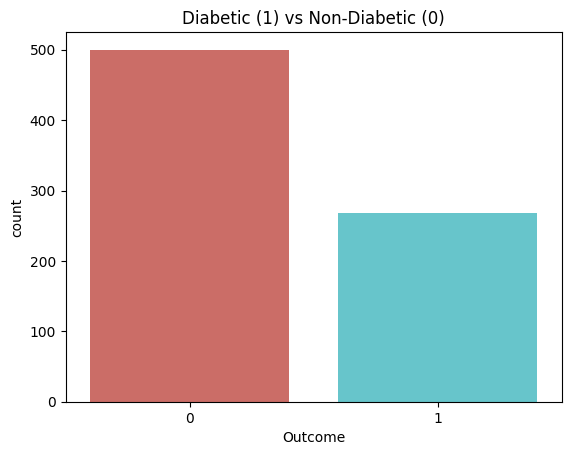

In [9]:
sns.countplot(x='Outcome', palette='hls', data=df)
plt.title("Diabetic (1) vs Non-Diabetic (0)")
plt.show()

/tmp/ipython-input-207336176.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='hls')


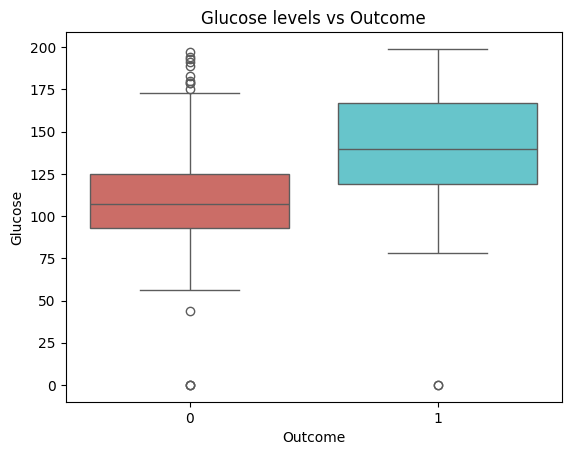

In [11]:
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='hls')
plt.title("Glucose levels vs Outcome")
plt.show()

/tmp/ipython-input-1463949218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='hls')


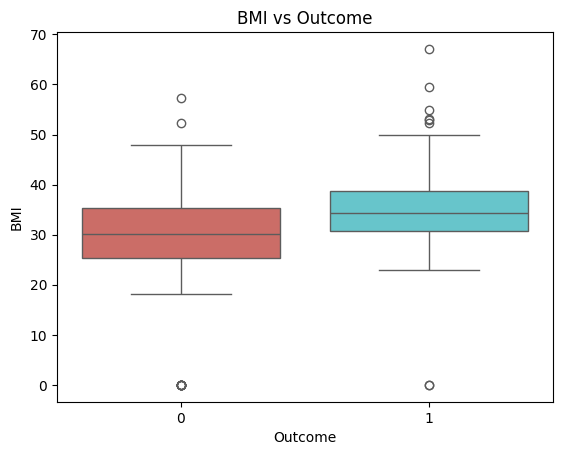

In [12]:
sns.boxplot(x='Outcome', y='BMI', data=df, palette='hls')
plt.title("BMI vs Outcome")
plt.show()

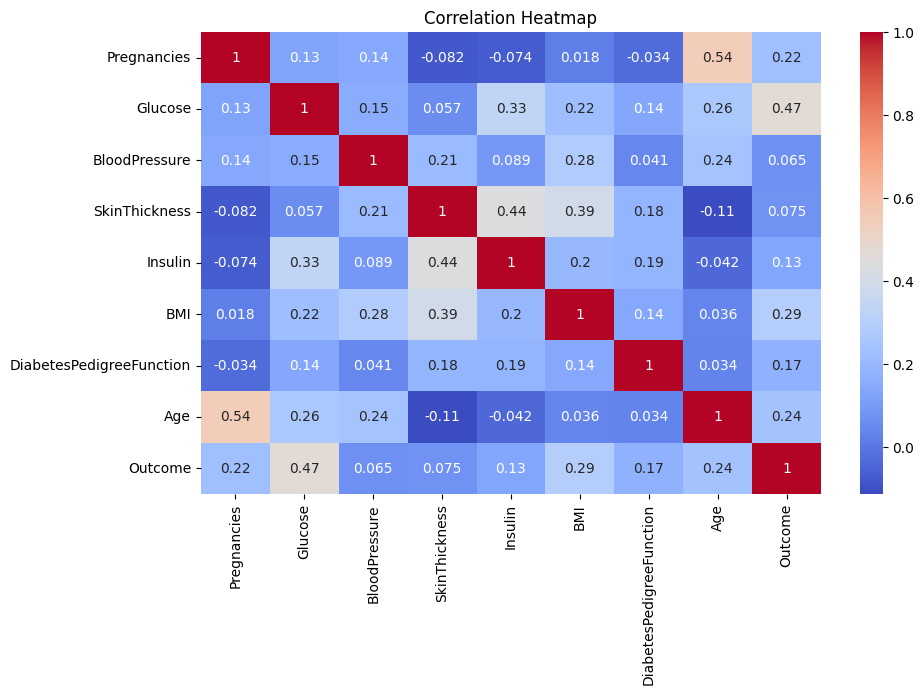

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Preparation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 614
Testing samples: 154


# Modeling & Training

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7142857142857143


In [27]:
# Support Vector Machine with GridSearch
svm = SVC()
params_svm = {'C':[0.1,1,10], 'kernel':['rbf'], 'gamma':[0.01,0.02,0.1,0.5,0.8,1]}
grid_svm = GridSearchCV(svm, params_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)
print("Best SVM params:", grid_svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

Best SVM params: {'C': 1, 'gamma': 0.02, 'kernel': 'rbf'}
SVM Accuracy: 0.7337662337662337


In [28]:
# Random Forest with GridSearch
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators':[50,100,200], 'max_depth':[None,5,10]}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
print("Best RF params:", grid_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Best RF params: {'max_depth': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.7467532467532467


In [29]:
# Classification reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


SVM Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154


Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weight

# Prediction Function

In [53]:
def predict_diabetes(model, scaler, patient_data):
    data = np.array(patient_data).reshape(1, -1)
    data_scaled = scaler.transform(data)
    prediction = model.predict(data_scaled)
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"

In [54]:
# Example patient data Non-Diabetic
example_patient = [2, 120, 70, 20, 79, 25.0, 0.5, 35]
# Example patient data Diabetic
example_patient2 = [5, 180, 85, 25, 150, 35.0, 0.8, 50]
# Example patient (borderline case → models may disagree)
example_patient3 = [1, 130, 80, 20, 85, 28.0, 0.35, 33]

In [55]:
# Logistic Regression
print("Logistic Regression Prediction:",predict_diabetes(log_reg, scaler, example_patient))
print("Logistic Regression Prediction:",predict_diabetes(log_reg, scaler, example_patient2))
print("Logistic Regression Prediction:",predict_diabetes(log_reg, scaler, example_patient3))

Logistic Regression Prediction: Non-Diabetic
Logistic Regression Prediction: Diabetic
Logistic Regression Prediction: Non-Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
# Best SVM model
print("SVM Prediction:",predict_diabetes(grid_svm.best_estimator_, scaler, example_patient))
print("SVM Prediction:",predict_diabetes(grid_svm.best_estimator_, scaler, example_patient2))
print("SVM Prediction:",predict_diabetes(grid_svm.best_estimator_, scaler, example_patient3))

SVM Prediction: Non-Diabetic
SVM Prediction: Diabetic
SVM Prediction: Non-Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
# Best Random Forest model
print("Random Forest Prediction:",predict_diabetes(grid_rf.best_estimator_, scaler, example_patient))
print("Random Forest Prediction:",predict_diabetes(grid_rf.best_estimator_, scaler, example_patient2))
print("Random Forest Prediction:",predict_diabetes(grid_rf.best_estimator_, scaler, example_patient3))

Random Forest Prediction: Non-Diabetic
Random Forest Prediction: Diabetic
Random Forest Prediction: Non-Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
